In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = hours * 8 + np.random.normal(0, 5, 10)
#random score [0, 100]
#scores = np.random.randint(0, 101, size=10)
df = pd.DataFrame({'Hours': hours, 'Scores': scores})
print(df)

   Hours     Scores
0      1   5.779516
1      2  16.296649
2      3  18.337482
3      4  31.676791
4      5  38.389602
5      6  45.073891
6      7  53.595752
7      8  59.673425
8      9  80.934915
9     10  84.856850


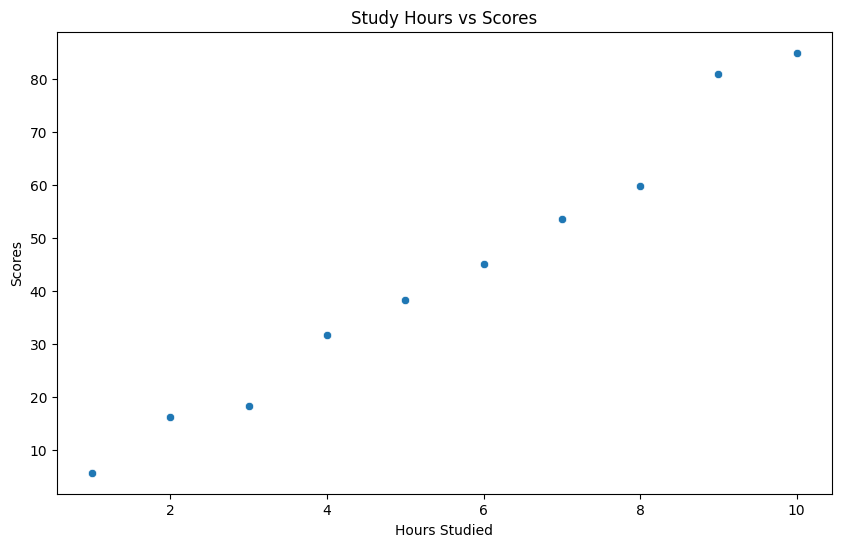

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Study Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [12]:
r = stats.pearsonr(df['Hours'], df['Scores'])
print(f"Pearson correlation coefficient: {r[0]:.2f}")

Pearson correlation coefficient: 0.99


Pearson correlation coefficient for price and demand: -1.00


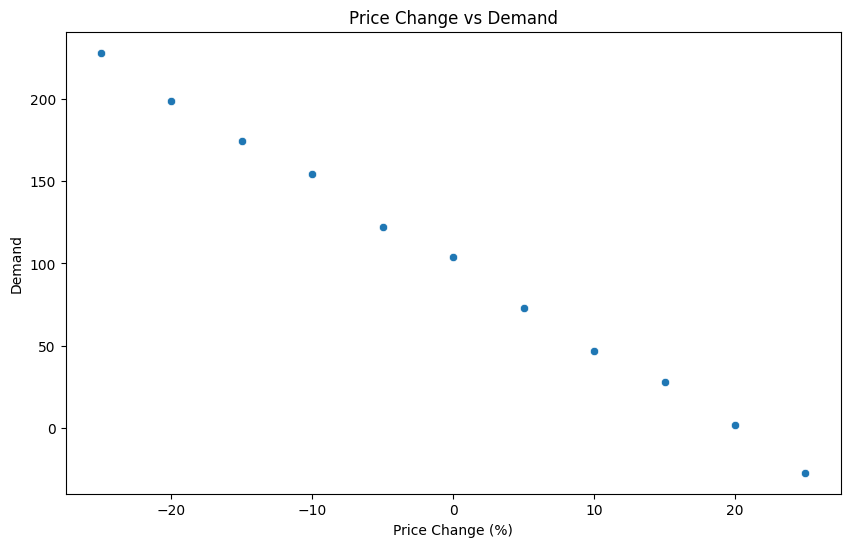

In [13]:
# Mô phỏng dữ liệu giá tăng thì nhu cầu giảm và ngược lại cho 1 mặt hàng với các mức tăng giảm 5% (nhu_cau = 100 - 5 * gia + np.random.normal(0, 2, 20))

price_changes = [-25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25]
demand = 100 - 5 * np.array(price_changes) + np.random.normal(0, 2, len(price_changes))
r = stats.pearsonr(price_changes, demand)
print(f"Pearson correlation coefficient for price and demand: {r[0]:.2f}")
df_demand = pd.DataFrame({'Price Change': price_changes, 'Demand': demand})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Change', y='Demand', data=df_demand)
plt.title('Price Change vs Demand')
plt.xlabel('Price Change (%)')
plt.ylabel('Demand')
plt.show()

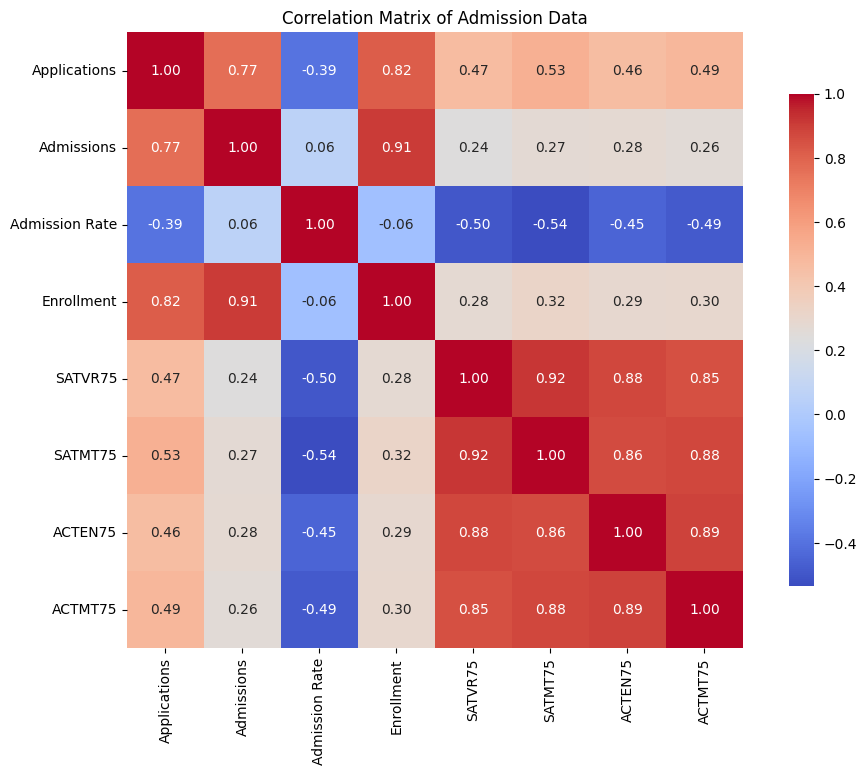

In [15]:
df_admission = pd.read_csv('df.csv')
cols = ['Applications', 'Admissions', 'Admission Rate', 'Enrollment', 'SATVR75', 'SATMT75', 'ACTEN75', 'ACTMT75']

df_admission = df_admission[cols].dropna()
corr_matrix = df_admission.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Admission Data')
plt.show()

In [17]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.log(x) + np.random.normal(0, 0.1, len(x))
df_log = pd.DataFrame({'X': x, 'Y': y})

r = stats.pearsonr(df_log['X'], df_log['Y'])
rho = stats.spearmanr(df_log['X'], df_log['Y'])
print(f"Pearson correlation coefficient: {r[0]:.2f}")
print(f"Spearman correlation coefficient: {rho[0]:.2f}")

Pearson correlation coefficient: 0.93
Spearman correlation coefficient: 0.94


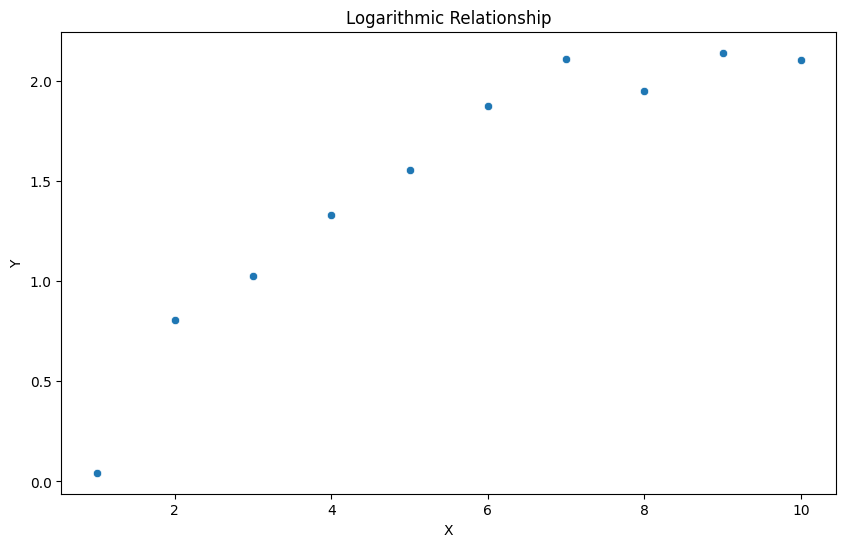

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=df_log)
plt.title('Logarithmic Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bootstrap_sample = [1, 2, 1, 2, 3, 4, 5, 6, 7, 8]

[np.float64(0.9764829395255348), np.float64(0.9886401008349541), np.float64(0.9878818309164851), np.float64(0.985031048949241), np.float64(0.9848254132346392), np.float64(0.9892592233264723), np.float64(0.9804852699851272), np.float64(0.9839207325286176), np.float64(0.9846381438324726), np.float64(0.9872963764273921)]


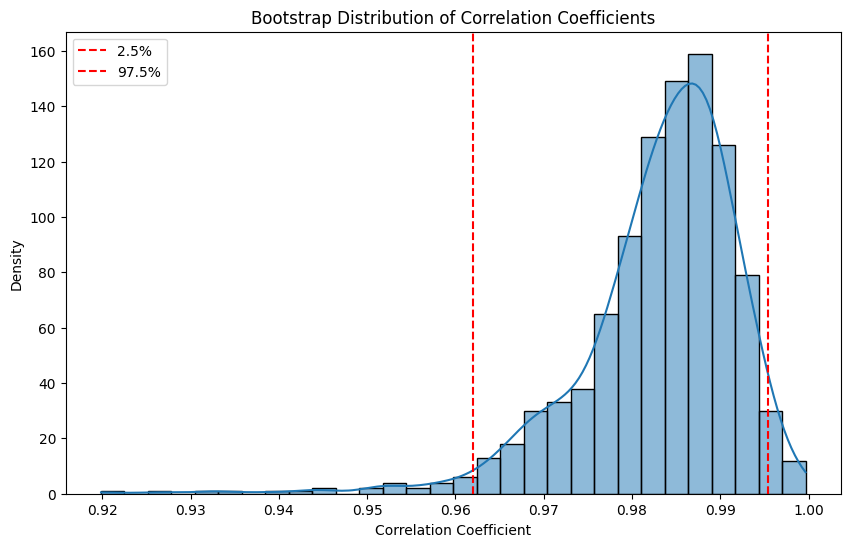

In [24]:
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = hours * 8 + np.random.normal(0, 5, 10)
#random score [0, 100]
#scores = np.random.randint(0, 101, size=10)
df = pd.DataFrame({'Hours': hours, 'Scores': scores})
n = 1000
bootstrap_corrs = []

for i in range(n):
    indices = np.random.choice(df.index, size=len(df), replace=True)
    bootstrap_sample = df.values[indices,:]
    r = stats.pearsonr(bootstrap_sample[:, 0], bootstrap_sample[:, 1])
    bootstrap_corrs.append(r[0])

alpha = 0.95
lower_bound = np.percentile(bootstrap_corrs, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bootstrap_corrs, (1 + alpha) / 2 * 100)

print(bootstrap_corrs[:10])  # Print first 10 bootstrap correlation coefficients
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_corrs, bins=30, kde=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5%')
plt.axvline(upper_bound, color='red', linestyle='--', label='97.5%')
plt.title('Bootstrap Distribution of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Density')
plt.legend()
plt.show()

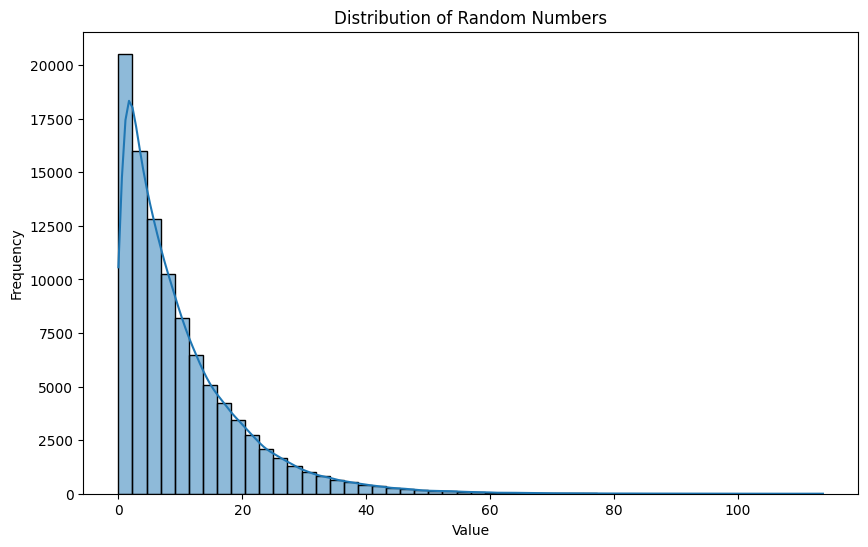

In [25]:
numbers = np.random.exponential(scale=10, size=100000)

plt.figure(figsize=(10, 6))
sns.histplot(numbers, bins=50, kde=True)
plt.title('Distribution of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

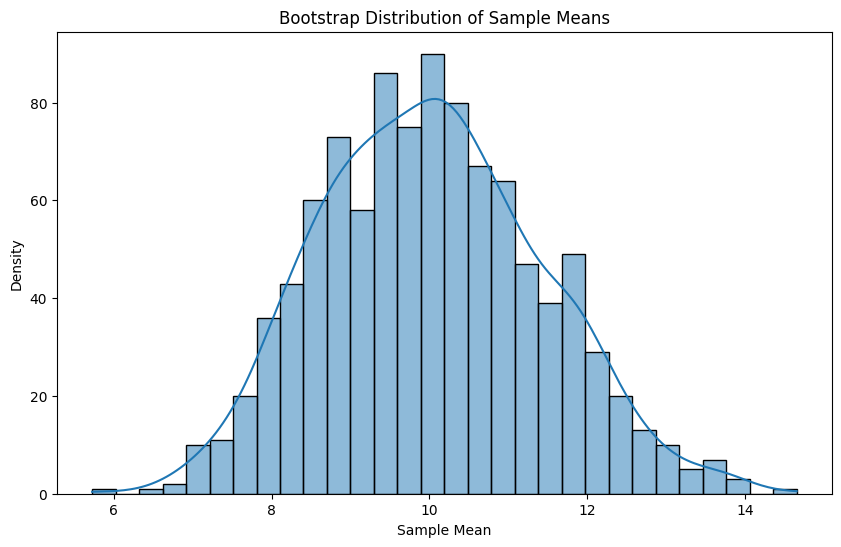

In [29]:
sample_size = 50
n_samples = 1000

sample_means = []

for i in range(n_samples):
    sample = np.random.choice(numbers, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True)
plt.title('Bootstrap Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

In [30]:
alpha = 0.95
z_score = stats.norm.ppf(1 - alpha / 2)
mean_sample = np.mean(sample_means)
std_sample = np.std(sample_means, ddof=1)
margin_of_error = z_score * (std_sample / np.sqrt(sample_size))
confidence_lower = mean_sample - margin_of_error
confidence_upper = mean_sample + margin_of_error
print(f"Confidence Interval: ({confidence_lower:.2f}, {confidence_upper:.2f})")

Confidence Interval: (10.01, 10.04)


In [31]:
std_numbers = np.std(numbers)
print(f"Standard Deviation of Numbers: {std_numbers:.2f}")

Standard Deviation of Numbers: 10.05


In [32]:
# Tính SE theo công thức SE = std / sqrt(n)
std_err = std_numbers / sample_size ** 0.5
print(f"Standard Error: {std_err:.2f}")

Standard Error: 1.42


In [34]:
std_samples = np.std(sample_means)
print(f"Standard Deviation of Sample Means: {std_samples:.2f}")


Standard Deviation of Sample Means: 1.40


In [38]:
group_a = stats.norm.rvs(loc=75, scale=10, size=100)
group_b = stats.norm.rvs(loc=77, scale=12, size=100)
group_c = stats.norm.rvs(loc=76, scale=11, size=100)

In [39]:
mean_a = np.mean(group_a)
mean_b = np.mean(group_b)
mean_c = np.mean(group_c)
print(f"Mean of Group A: {mean_a:.2f}")
print(f"Mean of Group B: {mean_b:.2f}")
print(f"Mean of Group C: {mean_c:.2f}")

Mean of Group A: 75.15
Mean of Group B: 77.75
Mean of Group C: 77.42


In [40]:
f, p = stats.f_oneway(group_a, group_b, group_c)
print(f'F-statistic: {f:.2f}, p-value: {p:.4f}')
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")

F-statistic: 1.69, p-value: 0.1855
Fail to reject the null hypothesis: No significant difference between group means.


In [43]:
movies_data = np.array([[60, 40], [40, 70]])
df  = pd.DataFrame(movies_data, index=['Man', 'Woman'], columns=['Action', 'Romantic'])
chi2, p_value, _, _ = stats.chi2_contingency(df)
print(f"Chi-squared statistic: {chi2:.2f}, p-value: {p_value:.4f}")
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between gender and movie preference.")
else:
    print("Fail to reject the null hypothesis: No significant association between gender and movie preference.")

Chi-squared statistic: 10.80, p-value: 0.0010
Reject the null hypothesis: There is a significant association between gender and movie preference.
